In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
twitter_dataset = pd.read_csv("Twitter_Sentiments.csv")

In [3]:
twitter_dataset.head()

,Unnamed: 0,id,label,tweet
0,0,1,0,@user when a father is dysfunctional and is s...
1,1,2,0,@user @user thanks for #lyft credit i can't us...
2,2,3,0,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation


In [4]:
#Save file
#twitter_dataset.to_csv('Twitter_Sentiments.csv')

In [5]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31962 non-null  int64 
 1   id          31962 non-null  int64 
 2   label       31962 non-null  int64 
 3   tweet       31962 non-null  object
dtypes: int64(3), object(1)
memory usage: 998.9+ KB


In [6]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [7]:
#ramove Twitter handles (@user)
twitter_dataset['clean_tweet'] = np.vectorize(remove_pattern)(twitter_dataset['tweet'], "@[\w]")

In [8]:
twitter_dataset.head()

,Unnamed: 0,id,label,tweet,clean_tweet
0,0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can't use ca...
2,2,3,0,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:

twitter_dataset['clean_tweer'] = twitter_dataset['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
twitter_dataset.head()

,Unnamed: 0,id,label,tweet,clean_tweet,clean_tweer
0,0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...,ser when a father is dysfunctional and is so ...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can't use ca...,ser ser thanks for #lyft credit i can t use ca...
2,2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
twitter_dataset["clean_tweet"] = twitter_dataset["clean_tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
twitter_dataset.head()

,Unnamed: 0,id,label,tweet,clean_tweet,clean_tweer
0,0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,ser when a father is dysfunctional and is so ...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...,ser ser thanks for #lyft credit i can t use ca...
2,2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation,factsguide: society #motivation,factsguide society now #motivation


In [11]:
tokenized_tweet = twitter_dataset['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [12]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
twitter_dataset['clean_tweet'] = tokenized_tweet
twitter_dataset.head()

,Unnamed: 0,id,label,tweet,clean_tweet,clean_tweer
0,0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...,ser when a father is dysfunctional and is so ...
1,1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...,ser ser thanks for #lyft credit i can t use ca...
2,2,3,0,bihday your majesty,bihday your majesti,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,factsguide society now #motivation


# Exploratory Data Analysis

In [14]:
from wordcloud import WordCloud

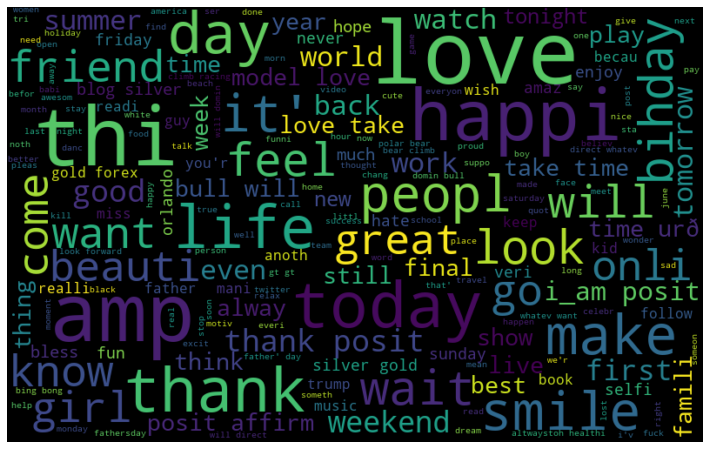

In [15]:
all_words = " ".join([sentence for sentence in twitter_dataset['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

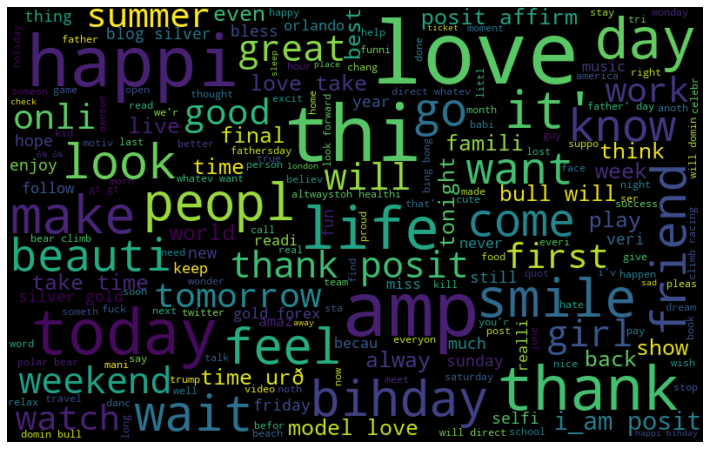

In [16]:
#frequent words visualyzation for +ve
all_words = " ".join([sentence for sentence in twitter_dataset['clean_tweet'][twitter_dataset['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

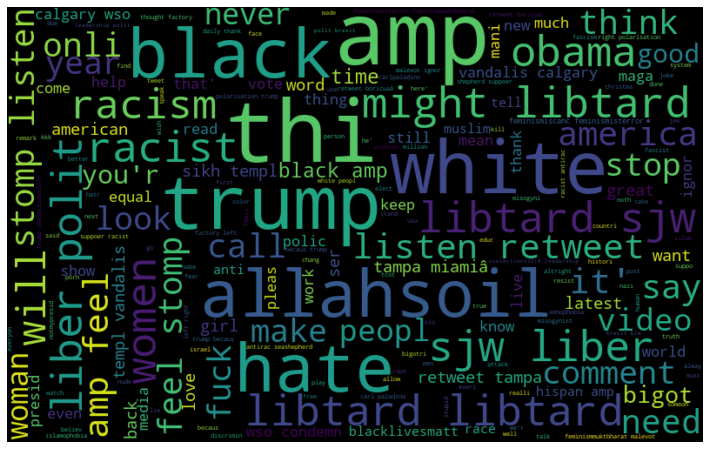

In [18]:
 #frequent words visualyzation for -ve
all_words = " ".join([sentence for sentence in twitter_dataset['clean_tweet'][twitter_dataset['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# extracting the hashing
def hashtag_extract(tweet):
    hashtags = []
    # loop words in the tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)",word)
        hashtags.append(ht)
    return hashtags

In [21]:
#extract hashtags from non recist/sexiest tweet
ht_possitive = hashtag_extract(twitter_dataset['clean_tweet'][twitter_dataset['label']==0])

#extract hashtags from recist/sexiest tweet
ht_negative = hashtag_extract(twitter_dataset['clean_tweet'][twitter_dataset['label']==1])

In [22]:
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'r

In [24]:
ht_possitive [:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [25]:
# unnest list
ht_negative = sum(ht_negative, [])
ht_possitive = sum(ht_possitive, [])

In [26]:
ht_possitive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [41]:
freq = nltk.FreqDist(ht_possitive)
d_possitive = pd.DataFrame({"Hashtag": list(freq.keys()),
                 "Count": list(freq.values())})
d_possitive.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


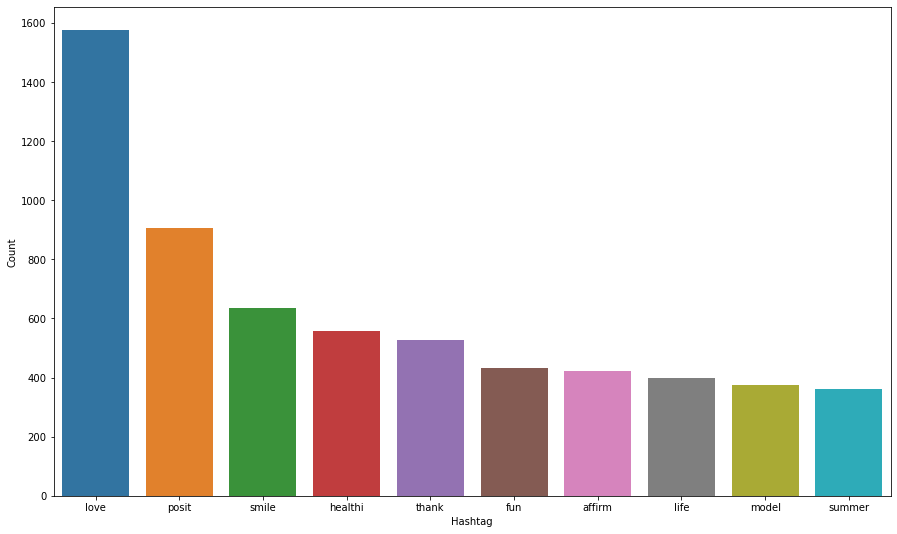

In [42]:
#select top 10 hashtags
d_possitive = d_possitive.nlargest(columns="Count",n = 10)
plt.figure(figsize=(15,9))
sns.barplot(data=d_possitive,x="Hashtag",y = "Count")
plt.show()

In [43]:
freq = nltk.FreqDist(ht_negative)
d_negative = pd.DataFrame({"Hashtag": list(freq.keys()),
                 "Count": list(freq.values())})
d_negative.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


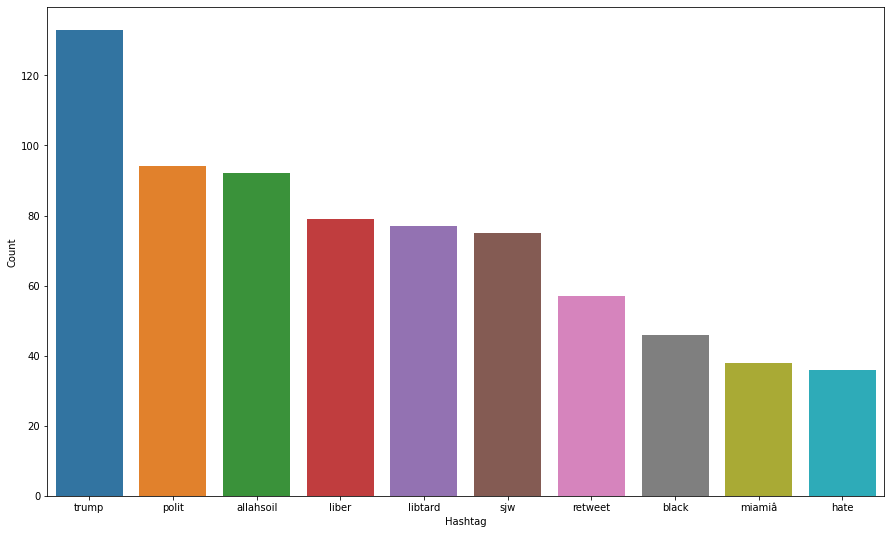

In [44]:
#select top 10 hashtags
d_negative = d_negative.nlargest(columns="Count",n = 10)
plt.figure(figsize=(15,9))
sns.barplot(data=d_negative,x="Hashtag",y = "Count")
plt.show()

In [45]:
#feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorize = CountVectorizer(max_df = 0.90, min_df = 2, max_features=1000, stop_words='english')
bow  = bow_vectorize.fit_transform(twitter_dataset['clean_tweet'])

In [50]:
#bow[0].toarray()

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow,twitter_dataset['label'], random_state=42, test_size=0.25)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [60]:
#trainning
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [61]:
#testing
prediction = model.predict(x_test)
f1_score(y_test, prediction)

0.5065398335315101

In [62]:
accuracy_score(y_test,prediction)

0.9480665748967588

# Use Probability

In [66]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = (np.int)

f1_score(y_test, pred)

TypeError: Expected sequence or array-like, got <class 'type'>